<a href="https://colab.research.google.com/github/hernss/MachineLearningCourse/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional neural network with tensor flow

## Get the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



--2023-02-13 19:44:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 172.253.63.128, 142.251.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   214MB/s    in 0.5s    

2023-02-13 19:44:59 (214 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Unzip
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

# Create class names for subdirectories name
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # Pick random image
  random_image = random.sample(os.listdir(target_folder),1)

  # Read image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  
  # Plot image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img

Image Shape: (512, 512, 3)


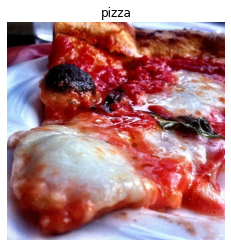

In [8]:
# View Random image from the training dataset

img = view_random_image("pizza_steak/train/", "pizza")


In [9]:
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 45,  31,  31],
        [ 46,  32,  32],
        [ 51,  39,  39],
        ...,
        [ 14,  24,  75],
        [  7,  17,  68],
        [ 12,  19,  71]],

       [[ 53,  39,  39],
        [ 47,  33,  33],
        [ 42,  30,  30],
        ...,
        [ 26,  34,  83],
        [ 26,  34,  83],
        [ 35,  43,  92]],

       [[ 42,  28,  28],
        [ 40,  28,  28],
        [ 40,  28,  28],
        ...,
        [ 36,  42,  90],
        [ 36,  42,  90],
        [ 45,  51,  99]],

       ...,

       [[207, 207, 241],
        [206, 206, 240],
        [210, 210, 244],
        ...,
        [208, 220, 242],
        [209, 222, 239],
        [207, 220, 237]],

       [[190, 190, 226],
        [206, 206, 242],
        [214, 214, 248],
        ...,
        [208, 221, 240],
        [212, 225, 241],
        [218, 231, 247]],

       [[184, 184, 220],
        [194, 194, 230],
        [206, 206, 242],
        ...,
        [213, 226, 24

In [10]:
img.shape


(512, 512, 3)

## End to end example

* Load our images
* Preproces
* Build CNN
* Compile our CNN
* Fit CNN with our train data

In [11]:
import tensorflow as target_class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

valid_data =  valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

# Build a CNN model (Tiny VGG)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  
])

# Compile model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


#Epoch 1/5
#47/47 [==============================] - 132s 3s/step - loss: 0.5749 - accuracy: 0.6887 - val_loss: 0.5100 - val_accuracy: 0.7320

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 226ms/step - loss: 0.5828 - accuracy: 0.6887 - val_loss: 0.4205 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4425 - accuracy: 0.8047 - val_loss: 0.3614 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4118 - accuracy: 0.8200 - val_loss: 0.3522 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3802 - accuracy: 0.8347 - val_loss: 0.3102 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3319 - accuracy: 0.8633 - val_loss: 0.3235 - val_accuracy: 0.8780


# Binary classification: Let's break it down

## Become one with the data

Image Shape: (512, 512, 3)
Image Shape: (512, 512, 3)


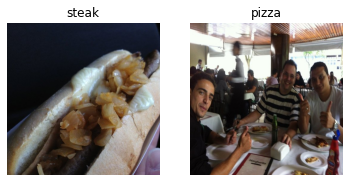

In [12]:
# Visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the data

In [13]:
# Define directory dataset
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Define our batch (32)

In [14]:
# Create train and test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Load data from directories
train_data = train_datagen.flow_from_directory(train_dir, 
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# Get a sample image

images, labels = train_data.next() # Get the next batch in train data
len(images), len(labels)

(32, 32)

In [17]:
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

## Create a CNN model (start with a baseline)


In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a model
model_4 = Sequential([
    Conv2D(filters=10,      # Sliding window count
           kernel_size=3,   # Size of sliding window
           strides=1,       # The size of the step the sliding window take across an input
           padding="valid", # If "same" keep output as equals input shape adding a padding zeros on border, if "valid" output shape gets compressed
           activation="relu", 
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # Output layer, sigmoid activation for binary classification
])


In [19]:
# Compile the model

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [20]:
model_4.summary()

# Check lenght if training and test data
len(train_data), len(test_data)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


(47, 16)

In [21]:
# Fit the model

history_4 = model_4.fit(train_data,     
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 215ms/step - loss: 0.7513 - accuracy: 0.6680 - val_loss: 0.5720 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4488 - accuracy: 0.7993 - val_loss: 0.4385 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3139 - accuracy: 0.8807 - val_loss: 0.3927 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1575 - accuracy: 0.9520 - val_loss: 0.4521 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.0762 - accuracy: 0.9800 - val_loss: 0.5395 - val_accuracy: 0.7960


In [22]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.5395 - accuracy: 0.7960


[0.539495050907135, 0.7960000038146973]

## Evaluate our model

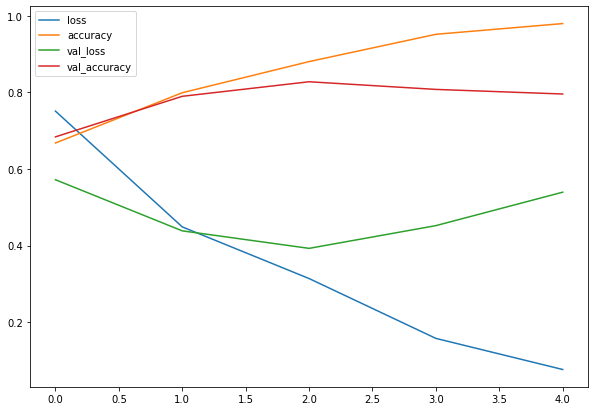

In [23]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [13]:
def plot_loss_curves(history):
  """
  Return separates loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation Loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Validation Accuracy")
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

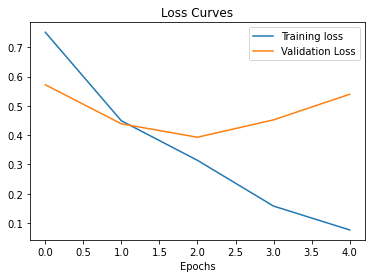

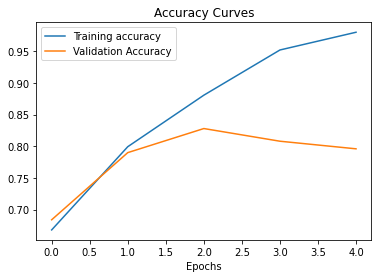

In [25]:
# Check out loss and accuracy for model 4
plot_loss_curves(history_4)

Si la curva de validation loss tiene a subir es porque el modelo tiene overfittig

## Reduce overfitting

* Add data augmentation
* Add regularizarion layers (MaxPool2D)
* Add more data..


In [26]:
# Create a model (This will be our new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [27]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [28]:
# Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 186ms/step - loss: 0.6216 - accuracy: 0.6487 - val_loss: 0.4839 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4838 - accuracy: 0.7800 - val_loss: 0.4591 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4356 - accuracy: 0.8133 - val_loss: 0.3461 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3983 - accuracy: 0.8287 - val_loss: 0.3702 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3813 - accuracy: 0.8247 - val_loss: 0.3538 - val_accuracy: 0.8460


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

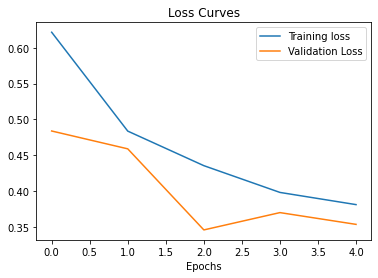

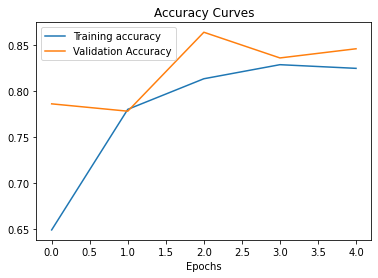

In [29]:
# Get model 5 summary
model_5.summary()

# Plot losses curves
plot_loss_curves(history_5)

## Data Augmentation

In [30]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
print("Augmented Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=True)

print("Non Augmented Data:")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=True)

print("Non Augmented Test Data:")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary")

Augmented Data:
Found 1500 images belonging to 2 classes.
Non Augmented Data:
Found 1500 images belonging to 2 classes.
Non Augmented Test Data:
Found 500 images belonging to 2 classes.


In [32]:
# Let's visualize some augmented data
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


(-0.5, 223.5, 223.5, -0.5)

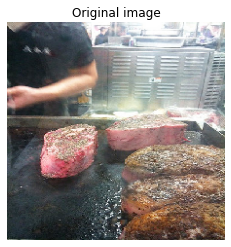

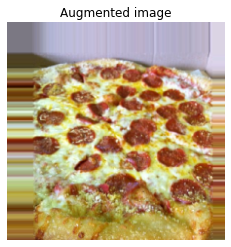

In [33]:
import random
random_number = random.randint(0,31)

plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

## Create a model with augmented data

In [34]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 476ms/step - loss: 0.6514 - accuracy: 0.6133 - val_loss: 0.4994 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5488 - accuracy: 0.7340 - val_loss: 0.4797 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 29s 613ms/step - loss: 0.5402 - accuracy: 0.7347 - val_loss: 0.4074 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 23s 483ms/step - loss: 0.5143 - accuracy: 0.7527 - val_loss: 0.4057 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.4983 - accuracy: 0.7580 - val_loss: 0.3611 - val_accuracy: 0.8500


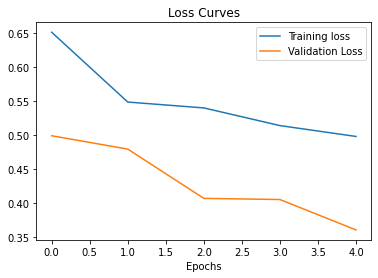

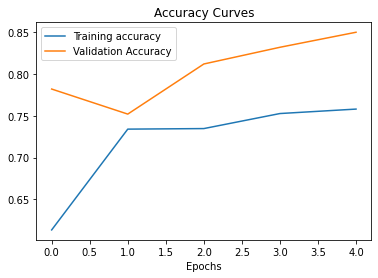

In [35]:
plot_loss_curves(history_6)

# Making a prediction with our trained model

In [36]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2023-02-13 19:50:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-02-13 19:50:18 (174 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

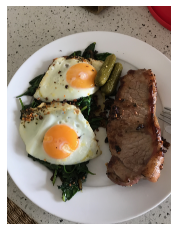

In [37]:
plt.imshow(steak)
plt.axis(False)

In [38]:
import tensorflow as tf
tf.expand_dims(steak, axis=0).shape # expand dims for batch dimension

TensorShape([1, 4032, 3024, 3])

## Preprocessing custom data

In [32]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns into a tensor and reshape
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (Normalize)
  img = img/255.
  return img

In [40]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [41]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 181ms/step


In [42]:
print(class_names)

['pizza' 'steak']


In [43]:
# We can index the predicted class on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [42]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename and predict its class
  """
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))
  
  plt.imshow(img)

  if len(pred[0]) > 1:
    # Multi-class
    print(tf.argmax(pred[0]))
    pred_class = class_names[tf.argmax(pred[0])]
    plt.title(f"Prediction: {pred_class} ({(np.max(pred)*100):.2f}%)")
  else:
    # Binary
    pred_class = class_names[int(tf.round(pred))]
    plt.title(f"Prediction: {pred_class} ({(float(pred)*100):.2f}%)")

  # Plot image and predictes class
  
  
  plt.axis(False)


1/1 [==============================] - 0s 22ms/step


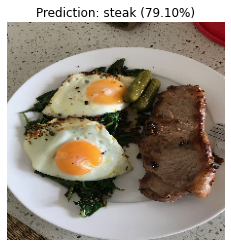

In [45]:
pred_and_plot(model_6, "03-steak.jpeg")

--2023-02-13 19:50:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-13 19:50:21 (232 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 21ms/step


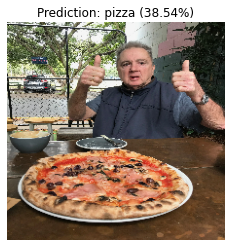

In [46]:
# Try another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_6, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 19ms/step


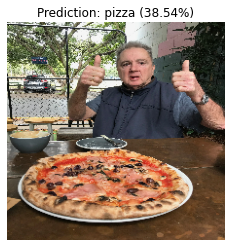

In [47]:
pred_and_plot(model_6, "03-pizza-dad.jpeg")

# Multi-class Classification


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-13 21:48:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  33.7MB/s    in 19s     

2023-02-13 21:49:06 (25.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/trai

In [4]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names, len(class_names)

(array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
        'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
       dtype='<U14'), 10)

Image Shape: (512, 384, 3)


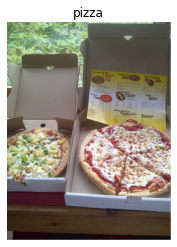

In [8]:
# Visualize the data
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir, 
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Creata a CNN model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create model

model_8 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # 10 output neurons for 10 differents classes.. activation softmax for multiclass
])

# Compile the model

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))




Epoch 1/5
235/235 [==============================] - 83s 309ms/step - loss: 2.1736 - accuracy: 0.1965 - val_loss: 1.9833 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 56s 238ms/step - loss: 1.9323 - accuracy: 0.3309 - val_loss: 1.9639 - val_accuracy: 0.3040
Epoch 3/5
235/235 [==============================] - 64s 271ms/step - loss: 1.7293 - accuracy: 0.4099 - val_loss: 1.9541 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 1.3526 - accuracy: 0.5437 - val_loss: 2.1358 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 54s 231ms/step - loss: 0.7608 - accuracy: 0.7537 - val_loss: 2.5301 - val_accuracy: 0.3012


## Evaluate the model

In [11]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 2.5301 - accuracy: 0.3012


[2.5300588607788086, 0.3012000024318695]

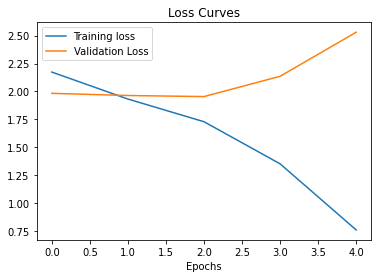

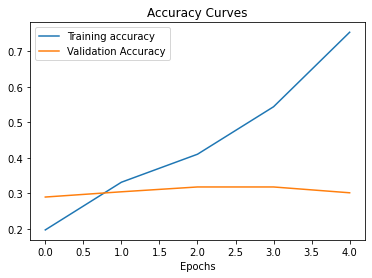

In [14]:
# Check out model's loss curves
plot_loss_curves(history_8)

## Adjust the model hyperparametersm to reduce overfitting

* Get more data
* Simplify the model e.g. reduce number of layers
* Use data augmentation
* User transfer learning

In [16]:
model_9 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [17]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [18]:
history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 254ms/step - loss: 2.1021 - accuracy: 0.2479 - val_loss: 1.9418 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.7350 - accuracy: 0.4167 - val_loss: 1.8327 - val_accuracy: 0.3628
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 1.3460 - accuracy: 0.5697 - val_loss: 1.9552 - val_accuracy: 0.3312
Epoch 4/5
235/235 [==============================] - 57s 244ms/step - loss: 0.8677 - accuracy: 0.7392 - val_loss: 2.1562 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 58s 248ms/step - loss: 0.4733 - accuracy: 0.8719 - val_loss: 2.6230 - val_accuracy: 0.3144


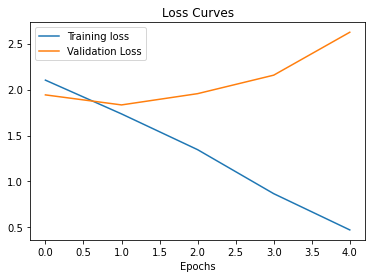

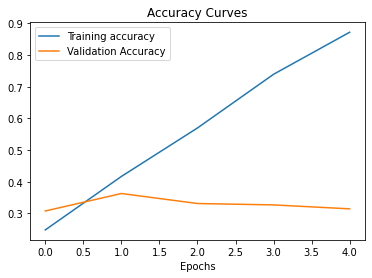

In [19]:
plot_loss_curves(history_9)

In [20]:
# Simplifying the model didn't reduce overfitting.. now try data augmentation

## Try data augmentation

In [21]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [22]:
# Create a model with augmented data

model_10 = tf.keras.models.clone_model(model_8) # Copy the models without any information, only architecture

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 521ms/step - loss: 2.2612 - accuracy: 0.1587 - val_loss: 2.0977 - val_accuracy: 0.2464
Epoch 2/5
235/235 [==============================] - 138s 587ms/step - loss: 2.1468 - accuracy: 0.2257 - val_loss: 2.0331 - val_accuracy: 0.2696
Epoch 3/5
235/235 [==============================] - 123s 522ms/step - loss: 2.0990 - accuracy: 0.2471 - val_loss: 1.9861 - val_accuracy: 0.2848
Epoch 4/5
235/235 [==============================] - 121s 514ms/step - loss: 2.0594 - accuracy: 0.2676 - val_loss: 1.8992 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0217 - accuracy: 0.2889 - val_loss: 1.8908 - val_accuracy: 0.3380


In [23]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 2.5301 - accuracy: 0.3012


[2.5300588607788086, 0.3012000024318695]

In [24]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.8908 - accuracy: 0.3380


[1.8908158540725708, 0.33799999952316284]

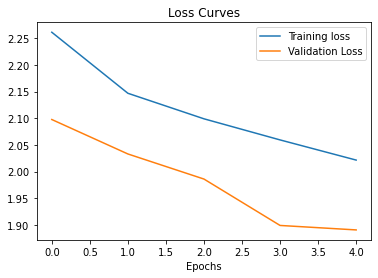

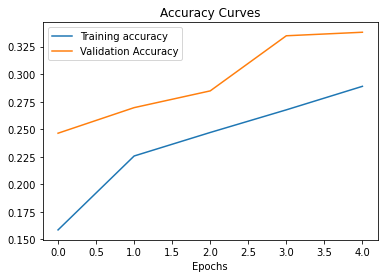

In [25]:
plot_loss_curves(history_10)

In [29]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-13 22:27:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-02-13 22:27:44 (117 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-02-13 22:27:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

1/1 [==============================] - 0s 32ms/step
tf.Tensor(5, shape=(), dtype=int64)


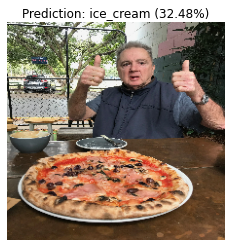

In [54]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names=class_names)

1/1 [==============================] - 0s 33ms/step
tf.Tensor(5, shape=(), dtype=int64)


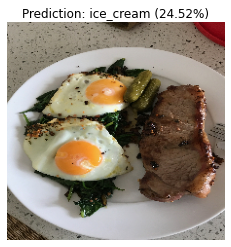

In [53]:
pred_and_plot(model_10, "03-steak.jpeg", class_names=class_names)

1/1 [==============================] - 0s 32ms/step
tf.Tensor(0, shape=(), dtype=int64)


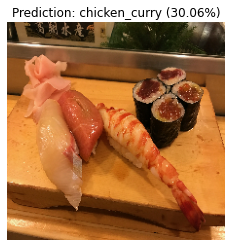

In [52]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names=class_names)

1/1 [==============================] - 0s 35ms/step
tf.Tensor(9, shape=(), dtype=int64)


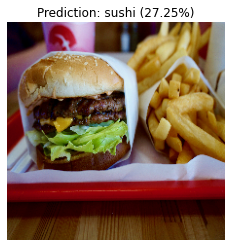

In [51]:
pred_and_plot(model_10, "03-hamburger.jpeg", class_names=class_names)

# Saving and loading the model

In [55]:
model_10.save("saved_trainned_model_10")

In [57]:
loadded_model_10 = tf.keras.models.load_model("saved_trainned_model_10")

In [58]:
loadded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.8908 - accuracy: 0.3380


[1.8908162117004395, 0.33799999952316284]